# Probabilistic Data Visualization 

Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.       In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM.

In this paper the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data. Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean.

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

$\textbf{Task:}$ Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.cm import get_cmap
import matplotlib.cm as cm
import matplotlib.colors as col
from matplotlib.colors import Normalize

# Set the seed so the same random numbers are generated each time 
np.random.seed(12345)

# Create the dataframe
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [2]:
# Finds the mean and standard deviation of each row in the dataframe
mean=list(df.mean(axis=1))
std=list(df.std(axis=1,ddof=0))

n=len(df)

# The y axis value of interest
y_test=42000

# The z value is 1.96 for 95% confidence interval 
y_error=1.96*(std/np.sqrt(len(df.columns)))

# Returns the confidence intervals given an x value and a y error
def conf_ints_func(x,y_error):
    upper=x+y_error
    lower=x-y_error
    return (lower,upper)

# 95% confidence intervals
conf_ints=[conf_ints_func(mean[i], y_error[i]) for i in range(len(mean))]

In [3]:
# Computes the probability the mean is greater than a given y value 
def compute_probs(y, conf_int):
    if y<np.min(conf_int):
        result=1.0
    if y>np.max(conf_int):
        result=0.0
    else:
        result=(np.max(conf_int)-y)/(np.max(conf_int)-(np.min(conf_int)))
    return result

# Probabilities for each year 
probs=[compute_probs(y_test, conf_int) for conf_int in conf_ints]

In [4]:
# Sets up colormap and creates a mappable object for our colorbar
cmap = get_cmap('bwr')
colors=cmap(probs)
mappable = cm.ScalarMappable(cmap=cmap, norm=col.Normalize(vmin=0, vmax=1.0))
mappable.set_array([])

<IPython.core.display.Javascript object>


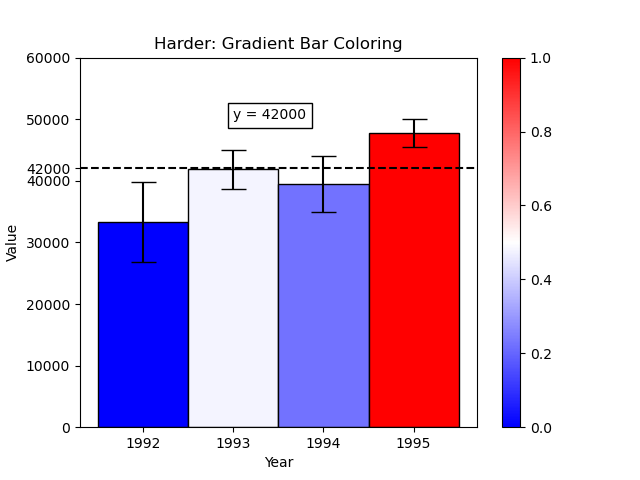

In [5]:
%matplotlib notebook

# Bar plot of each year's mean and confidence intervals
plt.bar(range(n), mean, width=1.0, edgecolor = "black", yerr=y_error, capsize=9, color=colors)
plt.xticks(range(n),[1992,1993,1994,1995])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Harder: Gradient Bar Coloring')

# Sets the horizontal line for y value of interest
hoz_line=plt.axhline(y_test, color='black', linestyle='--')
plt.colorbar(mappable) 

# Adds new tick to y axis and states the y value of interest 
yticks_old=plt.gca().get_yticks()
yticks=np.append(yticks_old, y_test)
y_text = plt.text(1,50000, 'y = %d' %y_test, bbox=dict(fc='white',ec='k'))
plt.gca().set_yticks(yticks)
plt.show()

# Here, dark blue(0.0) means the distribution is certainly below y value,
# white(0.5) if the y value is certainly contained,
# and red(1.0) if the value is certainly not contained as the distribution is above the y value.